In [53]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(
    lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

## Investigate Trending Skills - Data Engineer

In [54]:
df_DE = df[df['job_title_short']== 'Data Engineer'].copy()
df_DE

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"[nosql, mongodb, mongodb, python, elasticsearc...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."


* Aggregating job skills with job posted month

In [55]:
df_DE['job_posted_month_no'] = df_DE['job_posted_date'].dt.month

In [56]:
df_DE_exploded = df_DE.explode('job_skills')
df_DE_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,python,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,sql,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,c#,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,azure,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,airflow,"{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,spark,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,hadoop,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3


In [57]:
df_DE_pivot = df_DE_exploded.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size',fill_value=0)

In [58]:
#filtering top skills
df_DE_pivot.loc['Total'] = df_DE_pivot.sum()
df_DE_pivot.loc['Total'].sort_values(ascending=False).index

Index(['sql', 'python', 'aws', 'azure', 'spark', 'java', 'kafka', 'hadoop',
       'scala', 'databricks',
       ...
       'shogun', 'fastify', 'workfront', 'dlib', 'ember.js', 'homebrew',
       'asp.netcore', 'linode', 'chainer', 'dingtalk'],
      dtype='object', name='job_skills', length=239)

In [59]:
df_DE_pivot = df_DE_pivot[df_DE_pivot.loc['Total'].sort_values(ascending=False).index]

df_DE_pivot = df_DE_pivot.drop('Total')
df_DE_pivot

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,shogun,fastify,workfront,dlib,ember.js,homebrew,asp.netcore,linode,chainer,dingtalk
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,2,0,0,0,0,0,0,0,0,0
2,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,1,0,0,0,0,0,0,0,0,0
3,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
4,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,0,3,0,0,1,0
5,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
6,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,0,0,1,0,0,0,0,0,0,0
7,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,0,0,2,2,0,0,0,0,0,0
8,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,0,0,1,0,0,0,1,0,0,0
9,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,1,0,0,0,0,0,0,1,0,0


In [60]:
df_DE_pivot = df_DE_pivot.reset_index()
df_DE_pivot['job_posted_month'] = df_DE_pivot['job_posted_month_no'].apply(lambda x :pd.to_datetime(x,format = '%m').strftime('%b'))
df_DE_pivot = df_DE_pivot.set_index("job_posted_month")
df_DE_pivot = df_DE_pivot.drop(columns='job_posted_month_no')
df_DE_pivot

job_skills,sql,python,aws,azure,spark,java,kafka,hadoop,scala,databricks,...,shogun,fastify,workfront,dlib,ember.js,homebrew,asp.netcore,linode,chainer,dingtalk
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,12987,12426,6924,7138,6567,4246,3687,3533,3517,3002,...,2,0,0,0,0,0,0,0,0,0
Feb,9792,9378,5446,5278,4948,3300,2809,2774,2625,2272,...,1,0,0,0,0,0,0,0,0,0
Mar,9831,9410,5580,5283,4764,3223,2689,2592,2621,2378,...,0,0,0,0,0,0,0,0,0,0
Apr,8975,8670,5012,4901,4316,2931,2329,2340,2373,2170,...,0,0,0,0,0,3,0,0,1,0
May,8411,8169,4768,4466,3991,2725,2166,2195,2132,2034,...,0,0,0,0,0,0,1,0,0,0
Jun,9713,9216,5280,5091,4654,3092,2516,2468,2464,2317,...,0,0,1,0,0,0,0,0,0,0
Jul,9032,8493,5015,4857,4044,2757,2296,2235,2213,2161,...,0,0,2,2,0,0,0,0,0,0
Aug,9565,9016,5330,5070,4436,2961,2468,2421,2427,2310,...,0,0,1,0,0,0,1,0,0,0
Sep,8663,8213,4612,4646,3902,2584,2088,2024,2070,2198,...,1,0,0,0,0,0,0,1,0,0


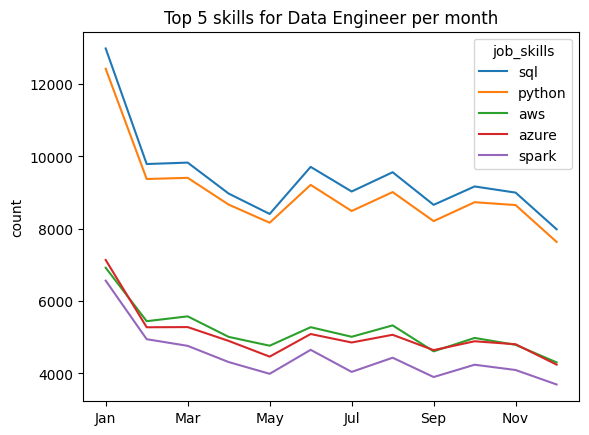

In [61]:
# Plotting all rows for first 5 columns
df_DE_pivot.iloc[: , :5].plot(kind='line')
plt.title('Top 5 skills for Data Engineer per month')
plt.ylabel("count")
plt.xlabel("")
plt.show()